<a href="https://colab.research.google.com/github/devthumos/Processamento_de_Linguagem_Natural/blob/main/Atividade_avaliativa_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atividade Avaliativa 06

## Treinando e Pegando o Output do Nosso Modelo, Bem Como o Nosso Dataset

In [73]:
#!pip install keras
#!pip install tensorflow

In [74]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.optimizers import SGD
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt

In [75]:
path_train = 'https://raw.githubusercontent.com/viniciusrpb/cic0269_natural_language_processing/main/datasets/corpora/tweets_polarity_classification/twitter-2013train-A.txt'
path_test = 'https://raw.githubusercontent.com/viniciusrpb/cic0269_natural_language_processing/main/datasets/corpora/tweets_polarity_classification/twitter-2013test-A.txt'
path_valid = 'https://raw.githubusercontent.com/viniciusrpb/cic0269_natural_language_processing/main/datasets/corpora/tweets_polarity_classification/twitter-2013dev-A.txt'

In [76]:
df_train = pd.read_csv(path_train,names=['id','polarity','text'],sep='\t')
df_valid = pd.read_csv(path_valid,names=['id','polarity','text'],sep='\t')
df_test = pd.read_csv(path_test,names=['id','polarity','text'],sep='\t')

In [77]:
df_test

,id,polarity,text
0,264238274963451904,positive,"@jjuueellzz down in the Atlantic city, ventnor..."
1,218775148495515649,positive,Musical awareness: Great Big Beautiful Tomorro...
2,258965201766998017,neutral,On Radio786 100.4fm 7:10 Fri Oct 19 Labour ana...
3,262926411352903682,negative,"Kapan sih lo ngebuktiin,jan ngomong doang Susa..."
4,171874368908050432,neutral,"Excuse the connectivity of this live stream, f..."
...,...,...,...
3542,264233437060288512,negative,Khaleda Zia's present India visit may have a b...
3543,263779058284904448,neutral,"FYI, golf fans: @jameslepp will join Moj on We..."
3544,250744453831213056,negative,@__Aniko you think mr.Calle let practice with ...
3545,258679974591090688,positive,Don't hide under your desk! It's just a salsa ...


In [78]:
print(f'Train size {df_train.shape}')
print(f'Valid size {df_valid.shape}')
print(f'Test size {df_test.shape}')

Train size (9684, 3)
Valid size (1654, 3)
Test size (3547, 3)


In [79]:
df_train = df_train.drop(labels=['id'],axis=1)
df_valid = df_valid.drop(labels=['id'],axis=1)
df_test = df_test.drop(labels=['id'],axis=1)

In [80]:
vectorizer = TfidfVectorizer(norm=None,lowercase=True,stop_words="english",max_df=0.95,min_df=2)

vectorizer.fit(df_train['text'])

tfidf_train = vectorizer.transform(df_train['text']).toarray()
tfidf_valid = vectorizer.transform(df_valid['text']).toarray()
tfidf_test = vectorizer.transform(df_test['text']).toarray()

In [81]:
df_train['polarity'] = pd.Categorical(df_train['polarity'])
y_train_int = df_train['polarity'].cat.codes

df_valid['polarity'] = pd.Categorical(df_valid['polarity'])
y_valid_int = df_valid['polarity'].cat.codes

df_test['polarity'] = pd.Categorical(df_test['polarity'])
y_test_int = df_test['polarity'].cat.codes

In [82]:
y_train = to_categorical(y_train_int)
y_valid = to_categorical(y_valid_int)
y_test = to_categorical(y_test_int)

In [83]:
X_train = tfidf_train
X_valid = tfidf_valid
X_test = tfidf_test

In [84]:
N = tfidf_train.shape[0]
vocab_size = tfidf_train.shape[1]
print(f'Quantidade de instancias de treinamento {N} e tamanho do vocabulario {vocab_size}')

Quantidade de instancias de treinamento 9684 e tamanho do vocabulario 7654


Arquitetura da Rede Multilayer Perceptron Profunda

Hyperparâmetros da rede

In [85]:
number_of_neurons_layer1 = 20
number_of_neurons_layer2 = 10
number_of_neurons_output = 3
lr = 0.01

In [86]:
model = Sequential()
# Input Layer
model.add(Dense(number_of_neurons_layer1,input_dim=vocab_size,activation='sigmoid'))
model.add(Dense(number_of_neurons_layer2,activation='sigmoid'))
model.add(Dense(number_of_neurons_output,activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 20)                153100    
                                                                 
 dense_7 (Dense)             (None, 10)                210       
                                                                 
 dense_8 (Dense)             (None, 3)                 33        
                                                                 
Total params: 153,343
Trainable params: 153,343
Non-trainable params: 0
_________________________________________________________________


In [87]:
sgd = SGD(learning_rate=lr)
model.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])

In [88]:
history = model.fit(X_train,y_train,validation_data=(X_valid,y_valid),epochs=50)

Epoch 1/50
303/303 [==============================] - 2s 6ms/step - loss: 1.0074 - accuracy: 0.4736 - val_loss: 1.0608 - val_accuracy: 0.4468
Epoch 2/50
303/303 [==============================] - 2s 5ms/step - loss: 1.0041 - accuracy: 0.4736 - val_loss: 1.0610 - val_accuracy: 0.4468
Epoch 3/50
303/303 [==============================] - 2s 5ms/step - loss: 1.0023 - accuracy: 0.4736 - val_loss: 1.0582 - val_accuracy: 0.4468
Epoch 4/50
303/303 [==============================] - 2s 5ms/step - loss: 1.0003 - accuracy: 0.4736 - val_loss: 1.0563 - val_accuracy: 0.4468
Epoch 5/50
303/303 [==============================] - 2s 5ms/step - loss: 0.9983 - accuracy: 0.4736 - val_loss: 1.0553 - val_accuracy: 0.4468
Epoch 6/50
303/303 [==============================] - 2s 5ms/step - loss: 0.9961 - accuracy: 0.4736 - val_loss: 1.0534 - val_accuracy: 0.4468
Epoch 7/50
303/303 [==============================] - 2s 6ms/step - loss: 0.9937 - accuracy: 0.4736 - val_loss: 1.0539 - val_accuracy: 0.4468
Epoch 

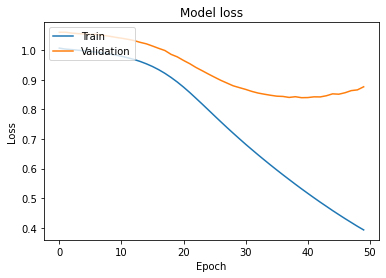

In [89]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

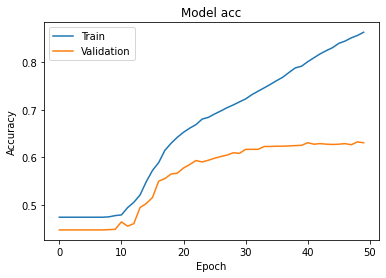

In [90]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model acc')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Avaliação com os Dados de Teste

In [91]:
y = model.evaluate(X_test,y_test)

111/111 [==============================] - 0s 3ms/step - loss: 0.8715 - accuracy: 0.6386


In [92]:
import numpy as np
y_prob = model.predict(X_test)
y_prob

array([[0.06137656, 0.25716293, 0.68146044],
       [0.00877249, 0.01264465, 0.97858286],
       [0.05635149, 0.8890481 , 0.05460039],
       ...,
       [0.10961959, 0.56730855, 0.3230719 ],
       [0.1262562 , 0.12723716, 0.74650675],
       [0.11624414, 0.5490354 , 0.33472058]], dtype=float32)

In [93]:
y_pred = np.argmax(y_prob,axis=1)
y_pred

array([2, 2, 1, ..., 1, 2, 1])

## Obtendo a Acurácia, Matriz de Confusão, Precisão, Revogação e F1 com Relação à Classificação do Nosso Modelo

In [170]:
y_test_int

0       2
1       2
2       1
3       0
4       1
       ..
3542    0
3543    1
3544    0
3545    2
3546    1
Length: 3547, dtype: int8

In [171]:
y_pred

array([2, 2, 1, ..., 1, 2, 1])

### Matriz de Confusão e Realizando a Contagem das Classificações

In [172]:
dict_count = {}
confusion_matrix = np.zeros((3, 3))
#  +  - .
#+
#-
#.
for row in range(y_test_int.shape[0]):
  confusion_matrix[y_test_int[row], y_pred[row]] += 1
  try:
    dict_count[y_test_int[row]] += 1
  except:
    dict_count[y_test_int[row]] = 1

In [173]:
confusion_matrix

array([[  88.,  362.,  109.],
       [  16., 1238.,  259.],
       [  19.,  517.,  939.]])

In [174]:
dict_count

{0: 559, 1: 1513, 2: 1475}

### Acurácia do nosso modelo

In [175]:
acc = 0
for row in range(confusion_matrix.shape[0]):
  acc += confusion_matrix[row, row]

acc /= y_test_int.shape[0]
acc

0.6385678037778404

### Obtendo a Precisão, Revogação e F1 de Cada Classe, Bem Como o Support

In [176]:
Pr = 0
Rv = 0

classification_report = pd.DataFrame(np.zeros((3, 3)), columns=["Precision", "Recall", "F1-Score"])

for row in range(confusion_matrix.shape[0]):
  Pr = confusion_matrix[row, row]
  Rv = confusion_matrix[row, row]
  Prsum = 0
  Rvsum = 0
  for k in range(confusion_matrix.shape[0]):
      Prsum += confusion_matrix[k, row]
      Rvsum += confusion_matrix[row, k]
  Pr /= Prsum
  Rv /= Rvsum
  F1 = 2 * Pr * Rv / (Pr + Rv)

  print(f"ROW {row}", Pr, Rv, F1)
  classification_report.Precision.iloc[row] = Pr
  classification_report.Recall.iloc[row] = Rv
  classification_report["F1-Score"].iloc[row] = F1

ROW 0 0.7154471544715447 0.15742397137745975 0.25806451612903225
ROW 1 0.5847897968823808 0.8182419035029742 0.6820936639118458
ROW 2 0.7184391736801836 0.6366101694915254 0.6750539180445722


In [177]:
classification_report["Support"] = classification_report.index.map(dict_count)

In [178]:
classification_report

,Precision,Recall,F1-Score,Support
0,0.715447,0.157424,0.258065,559
1,0.584790,0.818242,0.682094,1513
2,0.718439,0.636610,0.675054,1475


## Comparando a Matriz de Confusão, Acurácia e Reporte de Classificação

In [179]:
from sklearn.metrics import classification_report as cr, accuracy_score as acs, confusion_matrix as cm

## Para o formato do nosso classification report ficar parecido com o do sklearn
for i in classification_report:
  classification_report[i] = classification_report[i].apply(lambda sentence: f"{sentence:.2f}" if type(sentence) != int else sentence)

print(cr(y_test_int, y_pred)) ## sklearn
print(classification_report)  ## nosso

              precision    recall  f1-score   support

           0       0.72      0.16      0.26       559
           1       0.58      0.82      0.68      1513
           2       0.72      0.64      0.68      1475

    accuracy                           0.64      3547
   macro avg       0.67      0.54      0.54      3547
weighted avg       0.66      0.64      0.61      3547

  Precision Recall F1-Score  Support
0      0.72   0.16     0.26      559
1      0.58   0.82     0.68     1513
2      0.72   0.64     0.68     1475


In [180]:
print(cm(y_test_int, y_pred))  ## sklearn
print(confusion_matrix)        ## nosso

[[  88  362  109]
 [  16 1238  259]
 [  19  517  939]]
[[  88.  362.  109.]
 [  16. 1238.  259.]
 [  19.  517.  939.]]


In [181]:
print(acs(y_test_int, y_pred))  ## sklearn
print(acc)                      ## nosso

0.6385678037778404
0.6385678037778404
